In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\Garv Khurana\OneDrive\Desktop\spam.csv",encoding="latin1")

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [5]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["v1"]=le.fit_transform(df["v1"])

In [7]:
df

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='v1'>

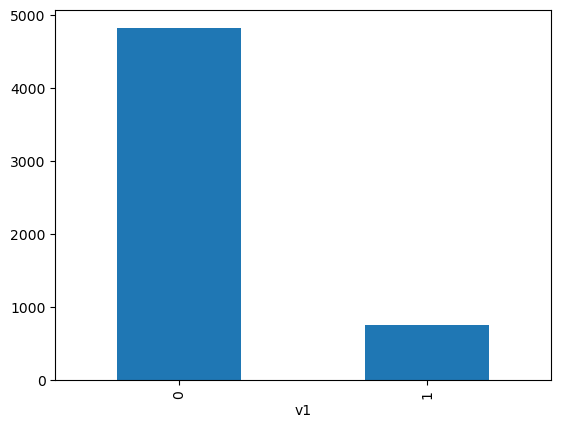

In [9]:
df["v1"].value_counts().plot(kind="bar")

<Axes: ylabel='count'>

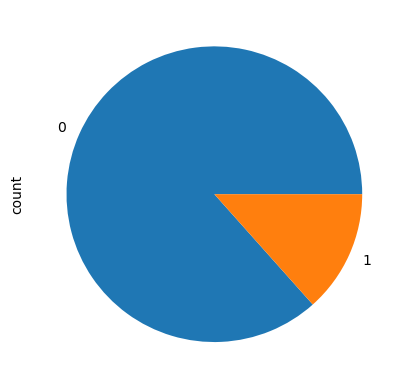

In [10]:
df["v1"].value_counts().plot(kind="pie")

In [11]:
df["v1"].value_counts()

v1
0    4825
1     747
Name: count, dtype: int64

In [12]:
x=df.drop(columns="v1")
y=df["v1"]

In [13]:
x

,v2
0,"Go until jurong point, crazy.. Available only ..."
1,Ok lar... Joking wif u oni...
2,Free entry in 2 a wkly comp to win FA Cup fina...
3,U dun say so early hor... U c already then say...
4,"Nah I don't think he goes to usf, he lives aro..."
...,...
5567,This is the 2nd time we have tried 2 contact u...
5568,Will Ì_ b going to esplanade fr home?
5569,"Pity, * was in mood for that. So...any other s..."
5570,The guy did some bitching but I acted like i'd...


In [14]:
x["length"]=x["v2"].apply(len)

In [15]:
x

,v2,length
0,"Go until jurong point, crazy.. Available only ...",111
1,Ok lar... Joking wif u oni...,29
2,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,U dun say so early hor... U c already then say...,49
4,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...
5567,This is the 2nd time we have tried 2 contact u...,161
5568,Will Ì_ b going to esplanade fr home?,37
5569,"Pity, * was in mood for that. So...any other s...",57
5570,The guy did some bitching but I acted like i'd...,125


<Axes: ylabel='Frequency'>

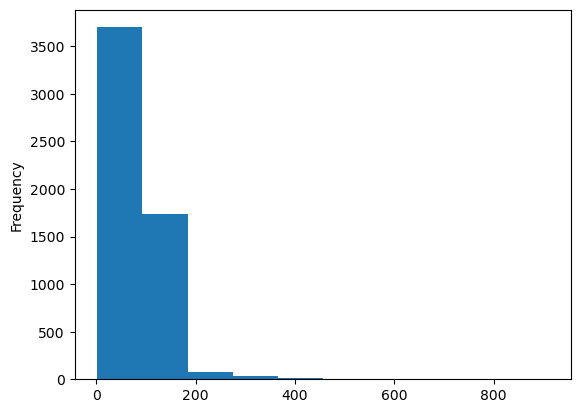

In [16]:
x["length"].plot(kind="hist")

In [17]:
import nltk

In [18]:
import re

In [19]:
from nltk.stem import WordNetLemmatizer
lemma=WordNetLemmatizer()
from nltk.corpus import stopwords

In [20]:
corpus=[]
for i in range(0,len(df["v2"])):
    review=re.sub('[^a-zA-Z]'," ",df["v2"][i])
    review=review.lower()
    review=review.split()
    review=[lemma.lemmatize(word) for word in review if not word in stopwords.words('english')]
    review=" ".join(review)
    corpus.append(review)

In [21]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [23]:
x=cv.fit_transform(corpus).toarray()

In [24]:
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [25]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: v1, Length: 5572, dtype: int32

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=50)

In [28]:
from sklearn.naive_bayes import MultinomialNB

In [29]:
classifier=MultinomialNB()

In [30]:
classifier.fit(x_train,y_train)

MultinomialNB()

In [31]:
prediction=classifier.predict(x_test)

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [37]:
cm=confusion_matrix(prediction,y_test)

In [40]:
cm

array([[1398,   19],
       [  28,  227]], dtype=int64)

In [41]:
accuracy_score(prediction,y_test)

0.97188995215311